##  Exploring the ratings of restaurants in India

Zomato is a restaurant reviews aggregator site which provides a platform for restaurant goers to review various restaurants they have visited. This data has been obtained from Kaggle datasets. 



In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploring the Data

In [2]:
data = pd.read_csv('zomato.csv', encoding = "ISO-8859-1")

In [3]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [4]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
country_code = pd.read_excel('Country-Code.xlsx')

In [6]:
country_code.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


### Let's have a look at the restaurants in India

We need to get the country code of India first. Although we see that directly here that the country code is 1 for India, it would be a good exercise to try to extract it from the data at hand.

In [7]:
country_code[country_code['Country'] == 'India']['Country Code']

0    1
Name: Country Code, dtype: int64

Thus the country code is 1, it is possible to find the country code of any other country using the above command.

In [8]:
data_india = data[data['Country Code'] == 1]

In [9]:
data_india.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


#### Finding the list of cuisines available in Indian restaurants

In [10]:
data_india['Cuisines'].unique()

array(['North Indian, Mughlai', 'North Indian', 'Rajasthani', ...,
       'Continental, Seafood, Chinese, North Indian, Biryani',
       'Burger, Pizza, Biryani',
       'American, North Indian, Thai, Continental'], dtype=object)

#### Total no of cuisines 

In [11]:
data_india['Cuisines'].nunique()

1392

#### Total no. of restaurants in India

In [12]:
data_india['Restaurant ID'].nunique()

8652

In [13]:
data_india.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Most of the restaurants covered by Zomata ratings and reviews seems to be in India in this particular data set. 

### What are we looking for?

As we go along with the analysis we will try to find out what factors influences the ratings of the restaurants. The ability to book a table for example might influence how a potential customer leaves a rating. Another important factor would be the authenticity of the cuisine being served. As a general rule of thumb one might say that a multi-cuisine restaurant might be less authentic than one that serves only one type of cuisine. I will try to cover such aspects in this analysis:

In [14]:
sns.set(font_scale=1.2, rc={'figure.figsize':(8,5)})
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

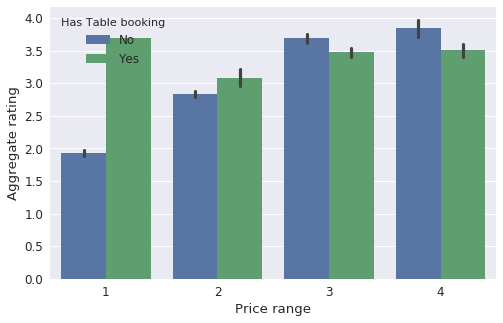

In [15]:
sns.barplot(x="Price range", y='Aggregate rating', hue='Has Table booking', data=data_india)

It seems that for restaurants that are more affordable (has a lower price range) have higher ratings if they provide table booking services.For pricier restaurants table booking option does not seem to affect the ratings much.

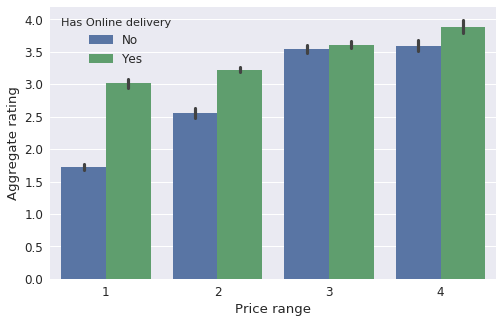

In [16]:
sns.barplot(x="Price range", y='Aggregate rating', hue='Has Online delivery', data=data_india)

Again for restaurants that are in the lower price range (1 and 2) seems to have better average rating if they provide online delivery services. This is not so signficant for the restaurants falling in the pricier category.

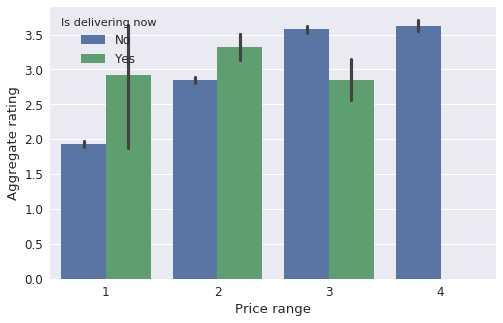

In [17]:
sns.barplot(x="Price range", y='Aggregate rating', hue='Is delivering now', data=data_india)

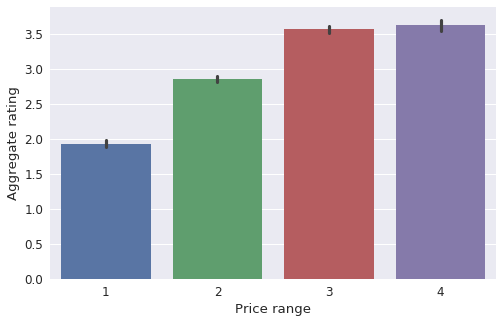

In [18]:
sns.barplot(x="Price range", y='Aggregate rating', data=data_india)

The 'Switch to order menu' service is not provided by any of the restaurants that have been reviewed in Zomato. But this interestingly shows the general trend of ratings provided by the users. The lower price restaurants in general have worser ratings compared to the pricier ones. There is essentially little difference in the ratings of price categories 1 and 2.

### Cuisines provided by the restaurants
The above restaurants are a mix of single cusine and multi-cuisine restaurant. The rating of restaurants will be affected by the authenticity of the cuisine they are serving. I will first make a column of cusines that is served by the restaurants.

In [19]:
def cusines_count(text):
    x = text.split(',')
    return len(x)

In [20]:
x = data_india['Cuisines'].apply(cusines_count)

In [21]:
x = x.rename("No. of cuisines")

In [22]:
x.name

'No. of cuisines'

In [23]:
data_modified = pd.concat([data_india, x], axis= 1)

In [24]:
data_modified.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,No. of cuisines
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,2
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,2
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,1
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,1
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,3


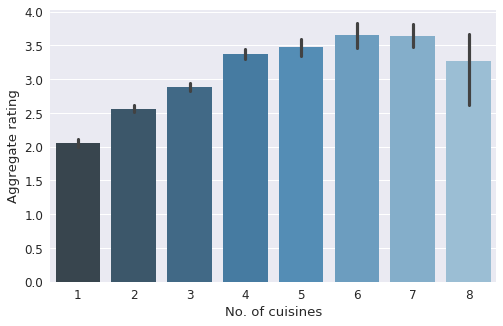

In [25]:
sns.barplot(x ='No. of cuisines', y = 'Aggregate rating', data= data_modified, palette="Blues_d" )

This is very interesting situation. It seems that contrary to my own expectations, it seems that multi-cusine restaurants in India seems to have a better aggregrate rating. It would be interesting to see the distribution divided between the four price ranges

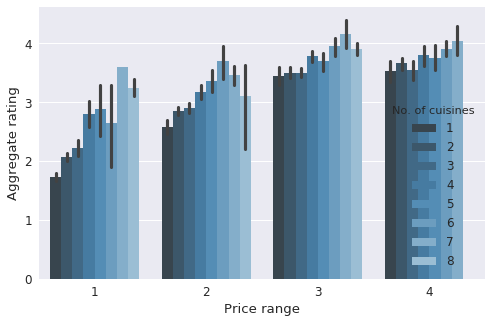

In [26]:
sns.barplot(x ="Price range", y = 'Aggregate rating', hue= 'No. of cuisines', data= data_modified, palette="Blues_d" )

The trend of the aggregate rating being better for multicuisine restaurant seems to be valid for all the price range of restaurants. Thus in India it is likely that if you have a multi-cuisine restaurant it would probably get better ratings. Additionally, the highest price category restaurants provide no more than 7 cuisines. Let us have a look at our modified dataset again:


In [27]:
data_modified.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,No. of cuisines
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,No,No,No,No,3,3.9,Yellow,Good,140,2
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,No,No,No,No,2,3.5,Yellow,Good,71,2
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,No,No,No,No,2,3.6,Yellow,Good,94,1
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,No,No,No,No,2,4.0,Green,Very Good,87,1
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,No,No,No,No,3,4.2,Green,Very Good,177,3


Another important parameter to know the is number of footfalls of each restaurants. However what we have here is the number of reviewers which is only proportional to the total number of footfalls over a given duration. Since the duration during which the reviews were obtained are not given, we will assume this to be the same for all restaurants as of now to have a general idea about the number of people who visit the restaurant. The number of footfalls per restaurant should also depend on the population of the city in which the restaurant is located, the location itself, cuisine etc. Curiously enough a better aggregate rating should also contribute to the number of footfalls. 

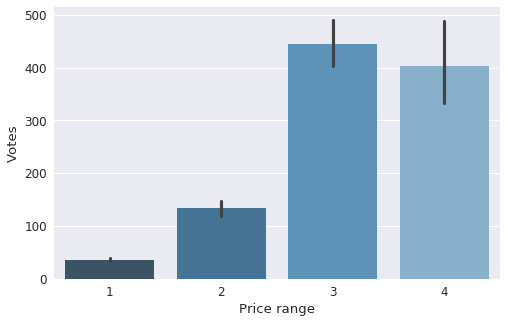

In [28]:
sns.barplot(x ="Price range", y = 'Votes', data= data_modified, palette="Blues_d" )

The more pricier restaurants seems to have larger number of reviews which implies the pricier restaurants seems to have a better footfall. It might be also possible that people who visit these restaurants are more internet savvy and likely to leave a review. Let us look at the relation between rating and number of votes:

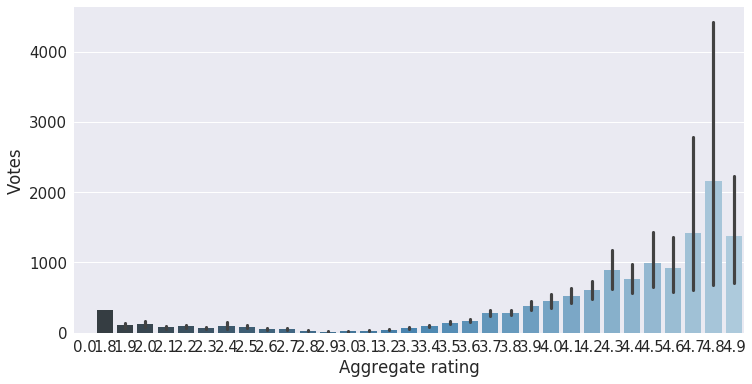

In [34]:
sns.set(font_scale=1.5, rc={'figure.figsize':(12,6)})
sns.barplot('Aggregate rating', 'Votes', data= data_modified, palette="Blues_d")

The above plot shows that the average votes received are disproportionately higher in the case of restaurants with higher ratings. Also the variability of footfalls is also large for the highly rated restaurants. This might be because there might be new restaurants which has better aggregate rating. However since the data does not mention the period during which the restaurants were obtained this is just a speculation. The location of the restaurant, how easily it is accessible by public transport, the population density in the region where it is located, whether it is closer to the center of the city etc. will also similarly play a role in determining the number of footfalls.